In [450]:
# Load dependencies
import numpy as np
import pandas as pd
import seaborn as sns

In [451]:
# Helper functions
def clean_cols(cols):
    cols_clean1 = cols.str.replace(' ', '_').str.replace('.', '')
    cols_clean2 = cols_clean1.str.replace('.', '') 
    cols_clean3 = [col.lower() for col in cols_clean2]
    return cols_clean3

In [452]:
file_path = "C:/Users/domen/github/pokemon_classification/datasets/Pokemon.csv"

df_raw = pd.read_csv(file_path)
df_raw.columns = clean_cols(df_raw.columns)
df_raw['type'] = df_raw.type.str.lower()
df_raw['other_type'] = df_raw.type.str.lower()

<ipython-input-451-47dc7d19cac3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cols_clean1 = cols.str.replace(' ', '_').str.replace('.', '')
<ipython-input-451-47dc7d19cac3>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cols_clean2 = cols_clean1.str.replace('.', '')


In [453]:
df_raw.head(4)

,pokedex_no,name,type,other_type,hp,attack,defense,special_attack,special_defense,speed,total,generation,legendary
0,1,Bulbasaur,grass,grass,45,49,49,65,65,45,318,1,0
1,2,Ivysaur,grass,grass,60,62,63,80,80,60,405,1,0
2,3,Venusaur,grass,grass,80,82,83,100,100,80,525,1,0
3,3,Mega Venusaur,grass,grass,80,100,123,122,120,80,625,1,0


In [454]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pokedex_no       1045 non-null   int64 
 1   name             1045 non-null   object
 2   type             1045 non-null   object
 3   other_type       1045 non-null   object
 4   hp               1045 non-null   int64 
 5   attack           1045 non-null   int64 
 6   defense          1045 non-null   int64 
 7   special_attack   1045 non-null   int64 
 8   special_defense  1045 non-null   int64 
 9   speed            1045 non-null   int64 
 10  total            1045 non-null   int64 
 11  generation       1045 non-null   int64 
 12  legendary        1045 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 106.3+ KB


As we had guessed, there is quite a significant class imbalance in the dataset. Less than 10% of the Pokemon are legendary.

In [455]:
print("-- pct")
print(df_raw.legendary.value_counts(normalize=True))
print("-- counts")
print(df_raw.legendary.value_counts())


-- pct
0    0.878469
1    0.121531
Name: legendary, dtype: float64
-- counts
0    918
1    127
Name: legendary, dtype: int64


array([[<AxesSubplot:title={'center':'hp'}>,
        <AxesSubplot:title={'center':'attack'}>,
        <AxesSubplot:title={'center':'defense'}>,
        <AxesSubplot:title={'center':'special_attack'}>],
       [<AxesSubplot:title={'center':'special_defense'}>,
        <AxesSubplot:title={'center':'speed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

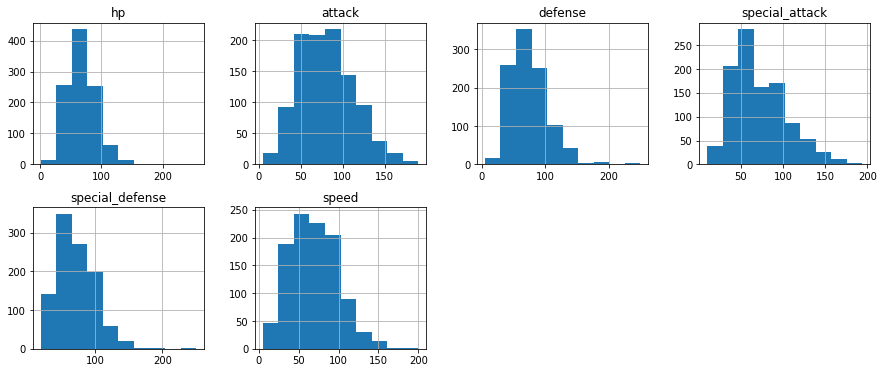

In [456]:
numerical = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
df_raw[numerical].hist(figsize=(15,6), layout=(2,4))

[Text(0.5, 1.0, 'total stats by Pokemon generation')]

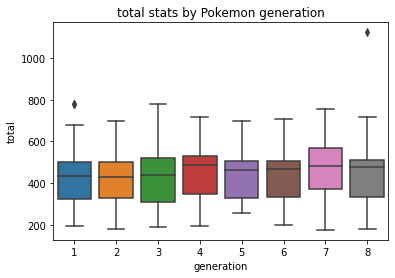

In [457]:
sns.boxplot(x=df_raw.generation, y=df_raw.total).set(title="total stats by Pokemon generation")

[Text(0.5, 1.0, 'total stats by Pokemon generation - no legendaries')]

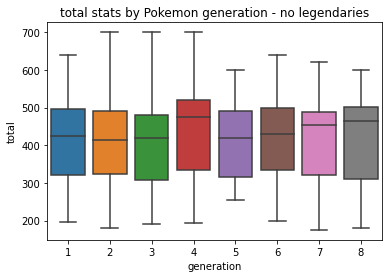

In [458]:
no_legendary_df = df_raw[df_raw.legendary==False]
(sns.boxplot(
    x=no_legendary_df.generation,
    y=no_legendary_df.total)
    .set(title="total stats by Pokemon generation - no legendaries"))


[Text(0.5, 1.0, 'total stats by Pokemon generation - only legendaries')]

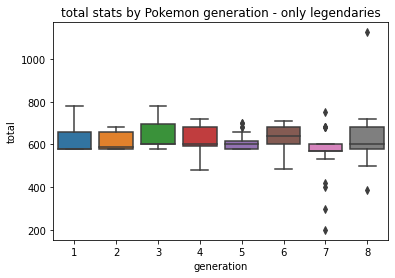

In [459]:
legendary_df = df_raw[df_raw.legendary==True]
(sns.boxplot(
    x=legendary_df.generation,
    y=legendary_df.total)
    .set(title="total stats by Pokemon generation - only legendaries"))


In [460]:
df_raw[df_raw.legendary==True].sort_values(by = 'total', ascending = False).head()
#df.sort_values(by = 'total', ascending = False).head(100)

df_raw['name'] = df_raw.name.str.lower()
df_raw['variant_ind'] = np.where(df_raw.name.str.startswith(("mega ", "ultra ", "primal ")), 1,
                             np.where(df_raw.name.str.endswith(("eternamax", "10% forme", "50% forme")), 1, 0))
df_raw['forme_ind'] = np.where(df_raw.name.str.endswith(("forme")), 1, 0)

df_raw.sort_values(by = 'total', ascending = False).head(50)
df_raw[df_raw.name.str.contains('forme')]

,pokedex_no,name,type,other_type,hp,attack,defense,special_attack,special_defense,speed,total,generation,legendary,variant_ind,forme_ind
466,386,deoxys normal forme,psychic,psychic,50,150,50,150,50,150,600,3,1,0,1
467,386,deoxys attack forme,psychic,psychic,50,180,20,180,20,150,600,3,1,0,1
468,386,deoxys defense forme,psychic,psychic,50,70,160,70,160,90,600,3,1,0,1
469,386,deoxys speed forme,psychic,psychic,50,95,90,95,90,180,600,3,1,0,1
582,487,giratina altered forme,ghost,ghost,150,100,120,100,120,90,680,4,1,0,1
583,487,giratina origin forme,ghost,ghost,150,120,100,120,100,90,680,4,1,0,1
588,492,shaymin land forme,grass,grass,100,100,100,100,100,100,600,4,1,0,1
589,492,shaymin sky forme,grass,grass,100,103,75,120,75,127,600,4,1,0,1
746,641,tornadus incarnate forme,flying,flying,79,115,70,125,80,111,580,5,1,0,1
747,641,tornadus therian forme,flying,flying,79,100,80,110,90,121,580,5,1,0,1


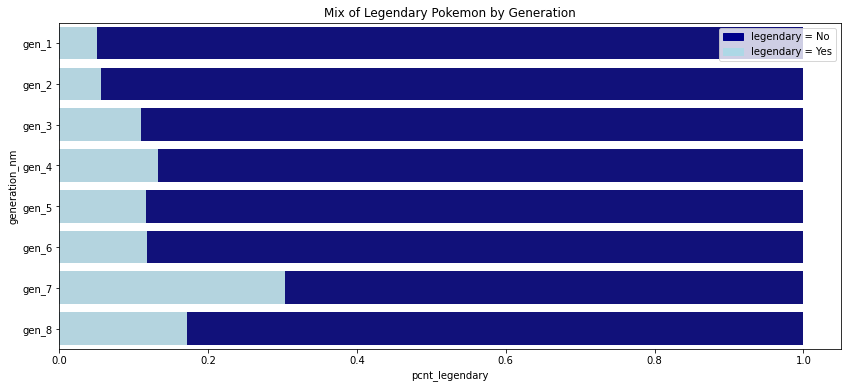

,generation_nm,name,legendary,pcnt_legendary,all
0,gen_1,197,10,0.0508,1
1,gen_2,108,6,0.0556,1
2,gen_3,165,18,0.1091,1
3,gen_4,121,16,0.1322,1
4,gen_5,171,20,0.1170,1
5,gen_6,85,10,0.1176,1
6,gen_7,99,30,0.3030,1
7,gen_8,99,17,0.1717,1


In [461]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
#poke = sns.load_dataset(df)

# set the figure size
plt.figure(figsize=(14, 6))

# from raw value to percentage
df_raw[['generation_nm']] = 'gen_' + df_raw['generation'].astype(str)
pokemon = df_raw.groupby('generation_nm')['name'].count().reset_index()
legendary = df_raw[df_raw.legendary==True].groupby('generation_nm')['legendary'].count().reset_index()
poke = pokemon.merge(legendary, how = "left", on = "generation_nm")
poke[["pcnt_legendary"]] = round(poke.legendary / poke.name, 4)
poke[["all"]] = 1


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(y="generation_nm",  x="all", data=poke, color="darkblue").set_title("Mix of Legendary Pokemon by Generation")
bar2 = sns.barplot(y="generation_nm",  x="pcnt_legendary", data=poke, color="lightblue")

# add legend
top_bar = mpatches.Patch(color='darkblue', label='legendary = No')
bottom_bar = mpatches.Patch(color='lightblue', label='legendary = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()
poke

Beause we have class imbalance, the following performance measures should be considered when evaluating our model:
- Confusion matrix
- Precision (exactness)
- Recall (completeness)
- F-score (weighted average of precision and recall)
- ROC curves (sensitivity and specificity)
- Kappa (or Cohen's kappa)

## SMOTE class balancing on Pokemon dataset
* [Credit: How to Effortlessly Handle Class Imbalance with Python and SMOTE](https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7)

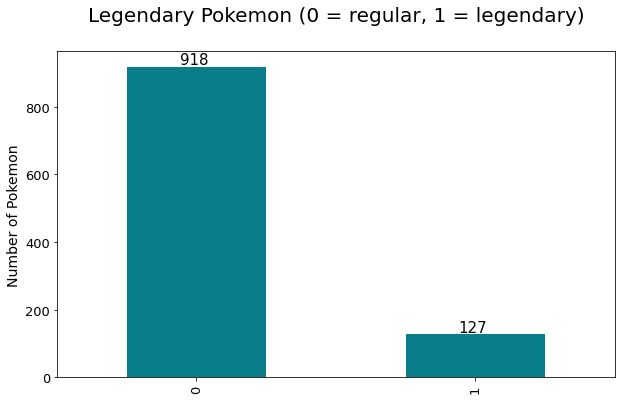

In [462]:
# Visualize counts of target
ax = df_raw['legendary'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Legendary Pokemon (0 = regular, 1 = legendary)', size=20, pad=30)
ax.set_ylabel('Number of Pokemon', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 7, str(round(i.get_height(), 2)), fontsize=15)

In [463]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pokedex_no       1045 non-null   int64 
 1   name             1045 non-null   object
 2   type             1045 non-null   object
 3   other_type       1045 non-null   object
 4   hp               1045 non-null   int64 
 5   attack           1045 non-null   int64 
 6   defense          1045 non-null   int64 
 7   special_attack   1045 non-null   int64 
 8   special_defense  1045 non-null   int64 
 9   speed            1045 non-null   int64 
 10  total            1045 non-null   int64 
 11  generation       1045 non-null   int64 
 12  legendary        1045 non-null   int64 
 13  variant_ind      1045 non-null   int32 
 14  forme_ind        1045 non-null   int32 
 15  generation_nm    1045 non-null   object
dtypes: int32(2), int64(10), object(4)
memory usage: 122.6+ KB


## Data prep

In [464]:
from sklearn.preprocessing import MinMaxScaler

# Create dataframe for analysis
df = df_raw.copy()
# Create dummy variables
dummy_type1 = pd.get_dummies(df['type'], prefix='type1', drop_first=True)
dummy_type2 = pd.get_dummies(df['other_type'], prefix='type2', drop_first=True)

# Variables to drop
to_drop = ['pokedex_no', 'forme_ind', 'name', 'type', 'other_type', 'generation', 'generation_nm']
df.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
merged = pd.concat([df, dummy_type1, dummy_type2], axis=1)

# Scale integer columns that have values greater than 1
#merged[["hp1", "attack1"]] = mms.fit_transform(merged[["hp", "attack"]]) # example
# cols_to_scale = [col for col in df.columns if df[col].max() > 1] # logic that should work but doesnt
cols_to_scale = ["hp", "attack", "defense", "special_attack", "special_defense", "speed", "total"]
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[cols_to_scale])
scaled = pd.DataFrame(scaled, columns=cols_to_scale)

# Replace original columns with scaled ones
for col in scaled:
    merged[col] = scaled[col]
    
merged.head(4)

,hp,attack,defense,special_attack,special_defense,speed,total,legendary,variant_ind,type1_dark,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,0.173228,0.237838,0.179592,0.298913,0.195652,0.205128,0.150526,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.232283,0.308108,0.236735,0.380435,0.260870,0.282051,0.242105,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.311024,0.416216,0.318367,0.489130,0.347826,0.384615,0.368421,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.311024,0.513514,0.481633,0.608696,0.434783,0.384615,0.473684,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## ML without SMOTE

In [465]:
# Setup ML dataset

from sklearn.model_selection import train_test_split

X = merged.drop('legendary', axis=1)
y = merged['legendary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state=37
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 11.88
% Positive class in Test  = 12.98


No Skill: ROC AUC=0.500
RF: ROC AUC=0.963
LR: ROC AUC=0.953

RF: Accuracy = 0.97
RF: Recall = 0.79

LR: Accuracy = 0.91
LR: Recall = 0.32



<AxesSubplot:title={'center':'RF: Confusion Matrix (with SMOTE)'}>

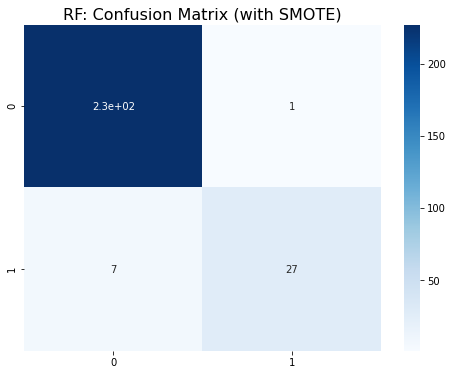

In [467]:
# Model building (with smote only)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# generate a no skill prediction (majority class... base rate = 50%)
ns_probs = [0 for _ in range(len(y_test))]

# model fitting --

# fit a random forest (rf) classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# fit a logistic regression (lr)
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

# predictions --

# get prediction for rf model
rf_preds = rf_model.predict(X_test)
rf_preds2 = rf_model.predict_proba(X_test)
rf_preds2 = rf_preds2[:, 1] # keep probabilities for the positive outcome only

# get prediction for lr model
lr_preds = lr_model.predict(X_test)
lr_preds2 = lr_model.predict_proba(X_test)
lr_preds2 = lr_preds2[:, 1] # keep probabilities for the positive outcome only

# model evaluation --

# area under curve (AUC)
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_preds2)
lr_auc = roc_auc_score(y_test, lr_preds2)

# precision & recall
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)

# Print results to console
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (rf_auc))
print('LR: ROC AUC=%.3f' % (lr_auc))

print(f'\nRF: Accuracy = {rf_accuracy:.2f}\nRF: Recall = {rf_recall:.2f}\n')
print(f'LR: Accuracy = {lr_accuracy:.2f}\nLR: Recall = {lr_recall:.2f}\n')

# Plot the RF confusion matrix
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
plt.title('RF: Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

## ML with SMOTE

In [424]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1045, 42)
Shape of X after SMOTE: (1836, 42)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: legendary, dtype: float64

No Skill: ROC AUC=0.500
RF: ROC AUC=0.995
LR: ROC AUC=0.980

RF: Accuracy = 0.97
RF: Recall = 0.98

LR: Accuracy = 0.95
LR: Recall = 0.95



<AxesSubplot:title={'center':'RF: Confusion Matrix (with SMOTE)'}>

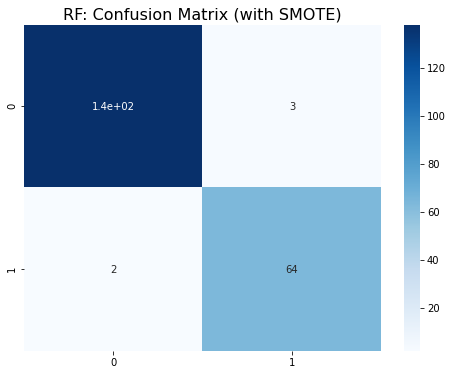

In [447]:
# Model building (with smote only)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# define train & test datasets from SMOTE only
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

# generate a no skill prediction (majority class... base rate = 50%)
ns_probs = [0 for _ in range(len(y_test))]

# model fitting --

# fit a random forest (rf) classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# fit a logistic regression (lr)
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

# predictions --

# get prediction for rf model
rf_preds = rf_model.predict(X_test)
rf_preds2 = rf_model.predict_proba(X_test)
rf_preds2 = rf_preds2[:, 1] # keep probabilities for the positive outcome only

# get prediction for lr model
lr_preds = lr_model.predict(X_test)
lr_preds2 = lr_model.predict_proba(X_test)
lr_preds2 = lr_preds2[:, 1] # keep probabilities for the positive outcome only

# model evaluation --

# area under curve (AUC)
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_preds2)
lr_auc = roc_auc_score(y_test, lr_preds2)

# precision & recall
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)

# Print results to console
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (rf_auc))
print('LR: ROC AUC=%.3f' % (lr_auc))

print(f'\nRF: Accuracy = {rf_accuracy:.2f}\nRF: Recall = {rf_recall:.2f}\n')
print(f'LR: Accuracy = {lr_accuracy:.2f}\nLR: Recall = {lr_recall:.2f}\n')

# Plot the RF confusion matrix
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
plt.title('RF: Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')

## ML with SMOTE & Undersampling

In [438]:
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define class balancing pipeline: first oversample, then undersample
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)

# create new datasets
X_smu, y_smu = pipeline.fit_resample(X, y)

print(f'''Shape of X before SMOTE & Undersampling: {X.shape}
Shape of X after SMOTE & Undersampling: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE & Undersampling: (1045, 42)
Shape of X after SMOTE & Undersampling: (1836, 42)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: legendary, dtype: float64

No Skill: ROC AUC=0.500
RF: ROC AUC=0.996
LR: ROC AUC=0.976

RF: Accuracy = 0.98
RF: Recall = 0.97

LR: Accuracy = 0.95
LR: Recall = 0.92



<AxesSubplot:title={'center':'RF: Confusion Matrix (with SMOTE)'}>

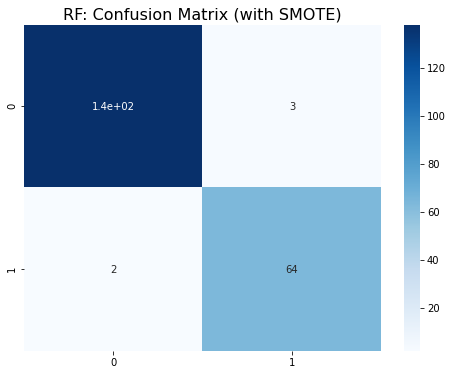

In [446]:
# Model building (with smote & undersampling)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# define train & test datasets from SMOTE + Undersampled dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_smu, y_smu, test_size=0.25, random_state=42
)

# generate a no skill prediction (majority class... base rate = 50%)
ns_probs = [0 for _ in range(len(y_test))]

# model fitting --

# fit a random forest (rf) classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# fit a logistic regression (lr)
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

# predictions --

# get prediction for rf model
rf_preds = rf_model.predict(X_test)
rf_preds2 = rf_model.predict_proba(X_test)
rf_preds2 = rf_preds2[:, 1] # keep probabilities for the positive outcome only

# get prediction for lr model
lr_preds = lr_model.predict(X_test)
lr_preds2 = lr_model.predict_proba(X_test)
lr_preds2 = lr_preds2[:, 1] # keep probabilities for the positive outcome only

# model evaluation --

# area under curve (AUC)
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_preds2)
lr_auc = roc_auc_score(y_test, lr_preds2)

# precision & recall
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)

# Print results to console
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (rf_auc))
print('LR: ROC AUC=%.3f' % (lr_auc))

print(f'\nRF: Accuracy = {rf_accuracy:.2f}\nRF: Recall = {rf_recall:.2f}\n')
print(f'LR: Accuracy = {lr_accuracy:.2f}\nLR: Recall = {lr_recall:.2f}\n')

# Plot the RF confusion matrix
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(8, 6))
plt.title('RF: Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues')